In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Deliverable 3: Preprocessing the Data for a Neural Network

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("/content/drive/MyDrive/School/UCF/Bootcamp/Class Folder/Neural_Network_Charity_Analysis/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], axis=1)

In [4]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
application_df.shape

(34299, 10)

In [7]:
application_df["STATUS"].value_counts()

1    34294
0        5
Name: STATUS, dtype: int64

In [8]:
application_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

In [9]:
application_df = application_df.drop(["STATUS", "SPECIAL_CONSIDERATIONS"], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [10]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()
application_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [11]:
application_df.APPLICATION_TYPE.unique()

array(['T10', 'T3', 'T5', 'T7', 'T4', 'T6', 'T2', 'T9', 'T19', 'T8',
       'T13', 'T12', 'T29', 'T25', 'T14', 'T17', 'T15'], dtype=object)

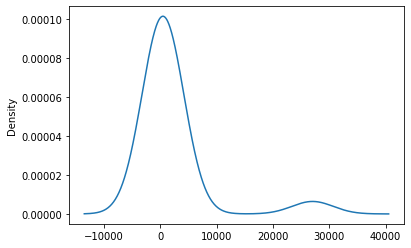

In [12]:
# Visualize the value counts of APPLICATION_TYPE
application_type_counts.plot.density()

In [13]:
# Determine which values to replace if counts are less than ...?
replace_application = list(application_type_counts[application_type_counts < 300].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [14]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

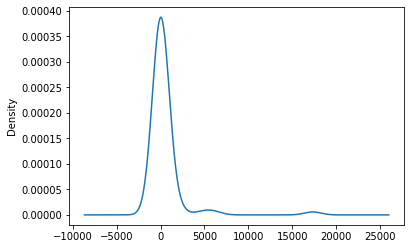

In [15]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [16]:
# Determine which values to replace if counts are less than ..?
replace_class = list(classification_counts[classification_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [17]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE    9
AFFILIATION         6
CLASSIFICATION      6
USE_CASE            5
ORGANIZATION        4
INCOME_AMT          9
dtype: int64

In [18]:
# Create a OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(tele_df[tele_cat]))
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df, left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
application_df.shape

(34299, 41)

In [21]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values
X_df = application_df.drop(["IS_SUCCESSFUL"],1)
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
len(X_train[0])

40

# Deliverable 3: Optimize the Model

In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("/content/drive/MyDrive/School/UCF/Bootcamp/Class Folder/Neural_Network_Charity_Analysis/checkpoints/",exist_ok=True)
checkpoint_path = "/content/drive/MyDrive/School/UCF/Bootcamp/Class Folder/Neural_Network_Charity_Analysis/checkpoints/weights.{epoch:02d}.hdf5"

Modify application_df to create a DataFrame with fewer outliers/columns having modified training data. Modify the NN model to have more complexity i.e. adding hidden layers, changing amount of neurons, changing the model time in epochs, or changing the activation functions.

In [25]:
application_df.columns

Index(['ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'APPLICATION_TYPE_T8',
       'AFFILIATION_CompanySponsored', 'AFFILIATION_Family/Parent',
       'AFFILIATION_Independent', 'AFFILIATION_National', 'AFFILIATION_Other',
       'AFFILIATION_Regional', 'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C3000',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANIZATION_Co-operative',
       'ORGANIZATION_Corporation', 'ORGANIZATION_Trust', 'INCOME_AMT_0',
       'INCOME_AMT_1-9999', 'INCOME_AMT_10000-24999',
       'INCOME_AMT_100000-499999', 'INCOME_AMT_10M-50M', 'INCOME_AMT_1M-5M',
       

In [26]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ASK_AMT                       34299 non-null  int64  
 1   IS_SUCCESSFUL                 34299 non-null  int64  
 2   APPLICATION_TYPE_Other        34299 non-null  float64
 3   APPLICATION_TYPE_T10          34299 non-null  float64
 4   APPLICATION_TYPE_T19          34299 non-null  float64
 5   APPLICATION_TYPE_T3           34299 non-null  float64
 6   APPLICATION_TYPE_T4           34299 non-null  float64
 7   APPLICATION_TYPE_T5           34299 non-null  float64
 8   APPLICATION_TYPE_T6           34299 non-null  float64
 9   APPLICATION_TYPE_T7           34299 non-null  float64
 10  APPLICATION_TYPE_T8           34299 non-null  float64
 11  AFFILIATION_CompanySponsored  34299 non-null  float64
 12  AFFILIATION_Family/Parent     34299 non-null  float64
 13  A

In [27]:
import plotly.express as px
fig = px.box(application_df, y="ASK_AMT")

fig.show()

In [28]:
import plotly.graph_objects as go

fig2 = go.Figure(data=[go.Box(y=application_df['ASK_AMT'],
            boxpoints='outliers', # can also be outliers, or suspectedoutliers, or False
            jitter=0.3, # add some jitter for a better separation between points
            pointpos=-1.8 # relative position of points wrt box
              )])

fig2.show()

In [29]:
application_df['ASK_AMT'].describe()

count    3.429900e+04
mean     2.769199e+06
std      8.713045e+07
min      5.000000e+03
25%      5.000000e+03
50%      5.000000e+03
75%      7.742000e+03
max      8.597806e+09
Name: ASK_AMT, dtype: float64

In [30]:
ask_amt_numpy = application_df.ASK_AMT.to_numpy()

In [31]:
import numpy as np
q3, q1 = np.percentile(ask_amt_numpy, [75, 25])
iqr = q3 - q1
iqr

2742.0

Outliers in ASK_AMT are more than 1.5(IQR) below Q1 or more than 1.5(IQR) above Q3.

In [32]:
outlier_value = (iqr * 1.5)
left_outliers = (5.000000e+03 - outlier_value)
right_outliers = (7.742000e+03 + outlier_value)

In [33]:
application_df[application_df.ASK_AMT.between(left_outliers, right_outliers)]

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M
0,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34293,5000,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34294,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34295,5000,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34296,5000,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
application_df_outliers_removed = application_df[application_df.ASK_AMT.between(left_outliers, right_outliers)]

In [35]:
application_df_outliers_removed['ASK_AMT'].describe()

count    26093.000000
mean      5082.225348
std        593.637940
min       5000.000000
25%       5000.000000
50%       5000.000000
75%       5000.000000
max      11854.000000
Name: ASK_AMT, dtype: float64

In [36]:
import plotly.express as px
fig3 = px.box(application_df_outliers_removed, y="ASK_AMT")

fig3.show()

In [37]:
import plotly.graph_objects as go

fig4 = go.Figure(data=[go.Box(y=application_df_outliers_removed['ASK_AMT'],
            boxpoints='outliers', # can also be outliers, or suspectedoutliers, or False
            jitter=0.3, # add some jitter for a better separation between points
            pointpos=-1.8 # relative position of points wrt box
              )])

fig4.show()

In [38]:
# Split our preprocessed data into our features and target arrays
y = application_df_outliers_removed["IS_SUCCESSFUL"].values
X = application_df_outliers_removed.drop(["IS_SUCCESSFUL"],1).values
X_df = application_df_outliers_removed.drop(["IS_SUCCESSFUL"],1)
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = number_input_features * 10
hidden_nodes_layer2 = number_input_features * 6
hidden_nodes_layer3 = number_input_features * 4

nn_optimized = tf.keras.models.Sequential()

# First hidden layer
nn_optimized.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn_optimized.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn_optimized.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optimized.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               16400     
                                                                 
 dense_1 (Dense)             (None, 240)               96240     
                                                                 
 dense_2 (Dense)             (None, 160)               38560     
                                                                 
 dense_3 (Dense)             (None, 1)                 161       
                                                                 
Total params: 151,361
Trainable params: 151,361
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
nn_optimized.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5,
    )

# Train the model
fit_model = nn_optimized.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

Streaming output truncated to the last 5000 lines.
457/612 [=====================>........] - ETA: 2s - loss: 0.5145 - accuracy: 0.7555
Epoch 30: saving model to /content/drive/MyDrive/School/UCF/Bootcamp/Class Folder/Neural_Network_Charity_Analysis/checkpoints/weights.30.hdf5
462/612 [=====================>........] - ETA: 2s - loss: 0.5151 - accuracy: 0.7550
Epoch 30: saving model to /content/drive/MyDrive/School/UCF/Bootcamp/Class Folder/Neural_Network_Charity_Analysis/checkpoints/weights.30.hdf5
467/612 [=====================>........] - ETA: 1s - loss: 0.5147 - accuracy: 0.7553
Epoch 30: saving model to /content/drive/MyDrive/School/UCF/Bootcamp/Class Folder/Neural_Network_Charity_Analysis/checkpoints/weights.30.hdf5
472/612 [======================>.......] - ETA: 1s - loss: 0.5156 - accuracy: 0.7546
Epoch 30: saving model to /content/drive/MyDrive/School/UCF/Bootcamp/Class Folder/Neural_Network_Charity_Analysis/checkpoints/weights.30.hdf5
477/612 [======================>.......] 

In [42]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimized.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 1s - loss: 0.5489 - accuracy: 0.7463 - 738ms/epoch - 4ms/step
Loss: 0.5489057302474976, Accuracy: 0.7463212609291077


In [43]:
# Export our model to HDF5 file
nn_optimized.save("/content/drive/MyDrive/School/UCF/Bootcamp/Class Folder/Neural_Network_Charity_Analysis/checkpoints/weights/AlphabetSoupCharityOptimized.h5")

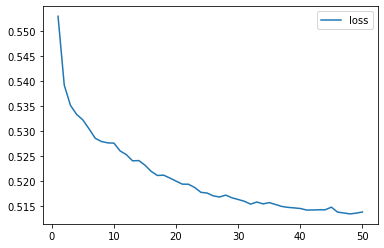

In [44]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

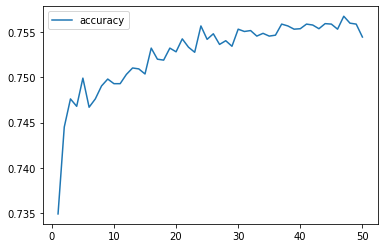

In [45]:
# Plot the accuracy
history_df.plot(y="accuracy")

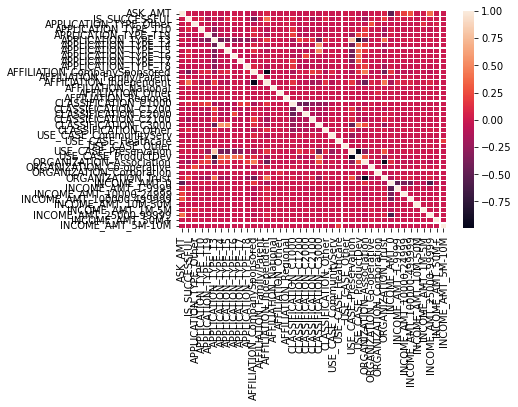

In [46]:
import seaborn as sns
import matplotlib as plt
corr = application_df_outliers_removed.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values, linewidths=0.1)

## Benchmark with another ML method such as Random Forest Classifier to find which inputs are more informative using sklearn's .feature_importances_

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [48]:
# create classifier
rf_model = RandomForestClassifier(n_estimators=200, random_state=1)
# fit model
rf_model = rf_model.fit(X_train_scaled, y_train)
# evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f"Random Forest Predictive Accuracy: {accuracy_score(y_test, y_pred):.3f}")

Random Forest Predictive Accuracy: 0.745


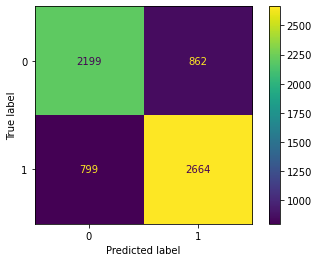

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
# create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# display the confusion matrix
display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)
display.plot()

In [50]:
from sklearn.metrics import classification_report
# print classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.72      0.73      3061
           1       0.76      0.77      0.76      3463

    accuracy                           0.75      6524
   macro avg       0.74      0.74      0.74      6524
weighted avg       0.75      0.75      0.75      6524



In [51]:
# get feature importances
importances = rf_model.feature_importances_

# column names
columns = X_df.columns

# create dataframe
feature_importances_df = pd.DataFrame({
    'feature': columns,
    'importance': importances
})

feature_importances_df.sort_values(by=['importance'], ascending=False, inplace=True)
feature_importances_df.reset_index(drop=True, inplace=True)
feature_importances_df

,feature,importance
0,AFFILIATION_Independent,0.234996
1,AFFILIATION_CompanySponsored,0.218824
2,ASK_AMT,0.046670
3,ORGANIZATION_Association,0.044041
4,APPLICATION_TYPE_T5,0.042915
5,APPLICATION_TYPE_T10,0.040571
6,ORGANIZATION_Trust,0.040513
7,CLASSIFICATION_C2100,0.036770
8,APPLICATION_TYPE_T19,0.035996
9,APPLICATION_TYPE_T4,0.027488


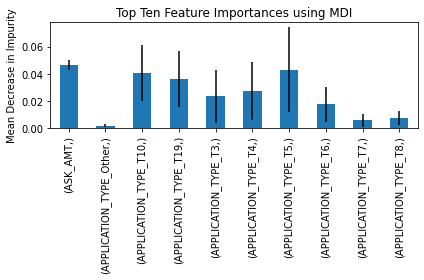

In [52]:
import numpy as np
import matplotlib.pyplot as plt
importances = rf_model.feature_importances_[:10]
std = np.std([
              tree.feature_importances_[:10] for tree in rf_model.estimators_], axis=0)

forest_importances = pd.Series(importances, index=[X_df.columns[:10]])

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Top Ten Feature Importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()